In [52]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definition of Lotka-Volterra System 
## Parameters:
- **$x_{0}=[5, 3]$**
- **$\theta = [2, 1, 4, 1]$**
- **$\theta=[\alpha, \beta, \gamma, \delta]$**
- **States: $x(t)=[S, W]$**

In [53]:
def lotka_volterra_system(state, t, alpha, beta, gamma, delta):
    s, w = state
    dsdt = alpha * s - beta * s * w
    dwdt = delta * s * w - gamma * w
    return [dsdt, dwdt]

In [54]:
alpha = 2
beta = 1
gamma = 4
delta = 1
initial_state = [5, 3]

## Time Points

In [55]:
t = np.linspace(0, 2, 200)
print(t.shape)

(200,)


## Solving the system

In [56]:
solution = odeint(lotka_volterra_system, initial_state, t, args=(alpha, beta, gamma, delta))
print(solution.shape)

(200, 2)


## Sampling Time Points

In [86]:
# t_sub = np.arange(0, 2, 0.2)
# index = np.int_((t_sub / 0.01))
# solution_sampling = solution[index]
# print(solution_sampling)
# De manera aleatoria
rng = np.random.RandomState(1)
training_index = rng.choice(np.arange(len(solution)), size=10, replace=False)
t_train, y_train = t[training_index], solution[training_index]
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)
# Con saltos de dt=0.2


## Plotting

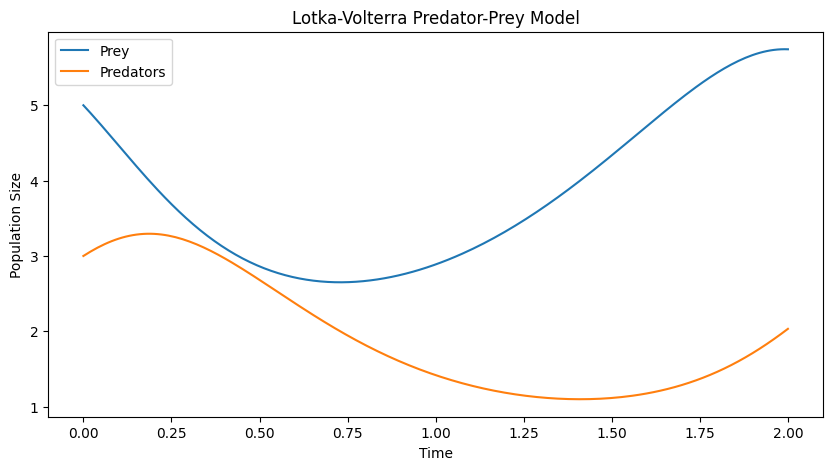

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='Prey')
plt.plot(t, solution[:, 1], label='Predators')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

## GP approach to inference solutions of LV System

In [88]:
T = t_train.reshape(-1, 1)
Y = y_train_noisy
print(T)

[[0.58291457]
 [0.40201005]
 [0.34170854]
 [1.02512563]
 [1.84924623]
 [1.98994975]
 [0.95477387]
 [0.04020101]
 [0.29145729]
 [1.68844221]]


In [89]:
kernel = RBF(length_scale_bounds=(1e-6, np.inf))

In [94]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2)
print(gp)

GaussianProcessRegressor(alpha=0.5625, kernel=RBF(length_scale=1))


In [95]:
gp.fit(T, Y)

GaussianProcessRegressor(alpha=0.5625, kernel=RBF(length_scale=1))

In [98]:
Y_pred, sigma = gp.predict(t.reshape(-1, 1), return_std=True)
print(sigma)

[[0.48570587 0.48570587]
 [0.47831649 0.47831649]
 [0.47102176 0.47102176]
 [0.46382958 0.46382958]
 [0.45674791 0.45674791]
 [0.44978478 0.44978478]
 [0.44294827 0.44294827]
 [0.43624648 0.43624648]
 [0.42968749 0.42968749]
 [0.42327937 0.42327937]
 [0.4170301  0.4170301 ]
 [0.41094756 0.41094756]
 [0.40503949 0.40503949]
 [0.39931344 0.39931344]
 [0.39377673 0.39377673]
 [0.38843637 0.38843637]
 [0.38329909 0.38329909]
 [0.37837118 0.37837118]
 [0.37365851 0.37365851]
 [0.36916645 0.36916645]
 [0.36489983 0.36489983]
 [0.36086285 0.36086285]
 [0.35705906 0.35705906]
 [0.35349131 0.35349131]
 [0.35016171 0.35016171]
 [0.34707155 0.34707155]
 [0.34422135 0.34422135]
 [0.34161076 0.34161076]
 [0.33923859 0.33923859]
 [0.3371028  0.3371028 ]
 [0.33520048 0.33520048]
 [0.33352792 0.33352792]
 [0.33208059 0.33208059]
 [0.33085319 0.33085319]
 [0.32983969 0.32983969]
 [0.3290334  0.3290334 ]
 [0.32842702 0.32842702]
 [0.32801269 0.32801269]
 [0.32778211 0.32778211]
 [0.32772654 0.32772654]


Text(0.5, 1.0, 'GP for inferencing solutions of Lotka-Volterra System')

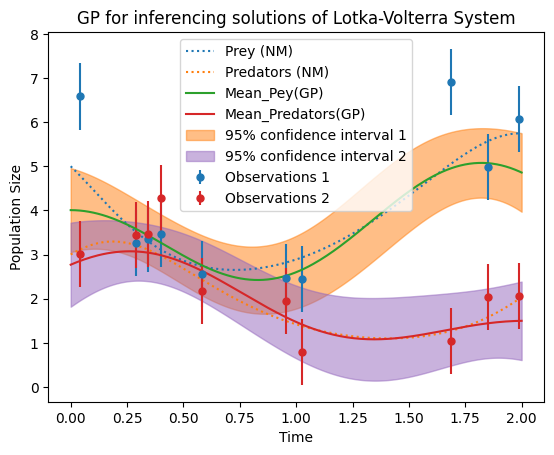

In [102]:
plt.plot(t, solution, label=['Prey (NM)', 'Predators (NM)'], linestyle='dotted')
plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
plt.plot(t, Y_pred, label=['Mean_Pey(GP)', 'Mean_Predators(GP)'])
plt.fill_between(t.ravel(), Y_pred[:, 0] - 1.96 * sigma[:, 0], Y_pred[:, 0] + 1.96 * sigma[:, 0], color='tab:orange', alpha=0.5, label=r'95% confidence interval 1')
plt.fill_between(t.ravel(), Y_pred[:, 1] - 1.96 * sigma[:, 1], Y_pred[:, 1] + 1.96 * sigma[:, 1], color='tab:purple', alpha=0.5, label=r'95% confidence interval 2')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.title("GP for inferencing solutions of Lotka-Volterra System")

## Jaime Grafica

In [ ]:
# Here Code: Subplot (2, 1):


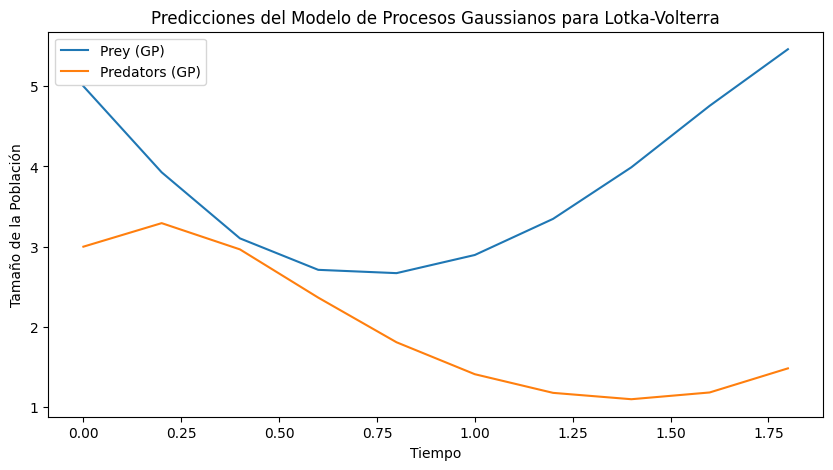

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(T, Y_pred, label=['Prey (GP)', 'Predators (GP)'])
plt.fill_between(T.ravel(), Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
plt.fill_between(T.ravel(), Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
plt.title('Predicciones del Modelo de Procesos Gaussianos para Lotka-Volterra')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()
plt.show()